# How to Easily Create Machine Learning Pipelines With DVC
## Create robust, reproducible pipelines with DVC

### What is a machine learning pipeline?

Imagine a machine learning pipeline as an unbreakable tunnel that stretches from one end of a mountain to the other. At the entrance of the tunnel is a massive avalanche of raw data, tumbling and cascading from all directions.

As the data enters the tunnel, it is cleaned, preprocessed, transformed and feature-selected into a form that is usable by machine learning models. Along the way, it passes through a series of checkpoints, where different models and algorithms are trained and tested, selecting only the strongest and most accurate ones to move on.

Finally, at the other end of the tunnel, the data emerges as a fully trained and operational machine learning model, ready to be deployed to the real world.

In a typical ML project, any checkpoint or stage in a pipeline may take dozens or even hundreds of iterations to get right. For this reason, it is imperative to use a reliable tool to track the pipeline building process and make it as straightforward and reproducible as possible.

One of those popular tools in the Python ecosystem is DVC - Data Version Control.

### What you will learn in this tutorial

SHOW A GIF OF `DVC REPRO` IN ACTION ON VSCODE.

### Setup

Start by cloning the `pipelines` branch of the following repository and opening the project with VSCode:

```
$ git clone --branch pipelines https://github.com/BexTuychiev/dvc-tutorial.git dvc-tutorial
$ cd dvc-tutorial
$ code .
```

Install the contents of `requirements.txt` in a virtual environment, preferably `conda`:

```
$ conda create -n dvc-tutorial python==3.9 -y
$ conda activate dvc-tutorial
$ python -r requirements.txt
```

> We will get to the scripts later.

The `pipelines` branch already comes with DVC initialized, so you only have to run `dvc pull` to get the data from the remote storage:

```
$ dvc get REMOTE_LINK # To be added later
```

The `get` command will download the contents of the `data` directory. Afterward, the project's tree structure should look like below:

Afterwards, your project tree should resemble the following structure:

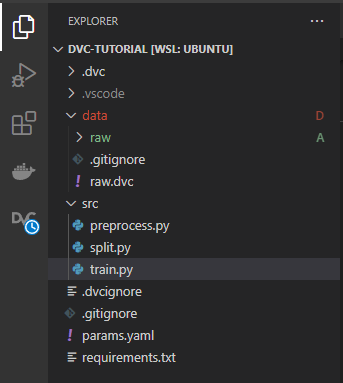

The `train` and `test` folders contain images with varying sizes from the [German Traffic Signs Recognition Benchmark dataset](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign). There are 43 classes of traffic signs and over 40k images.

You should also install the [DVC VSCode extension](https://marketplace.visualstudio.com/items?itemName=Iterative.dvc) from the marketplace, if you haven't already done so from the [previous tutorial](THE PREVIOUS TUTORIAL WILL BE LINKED HERE LATER):

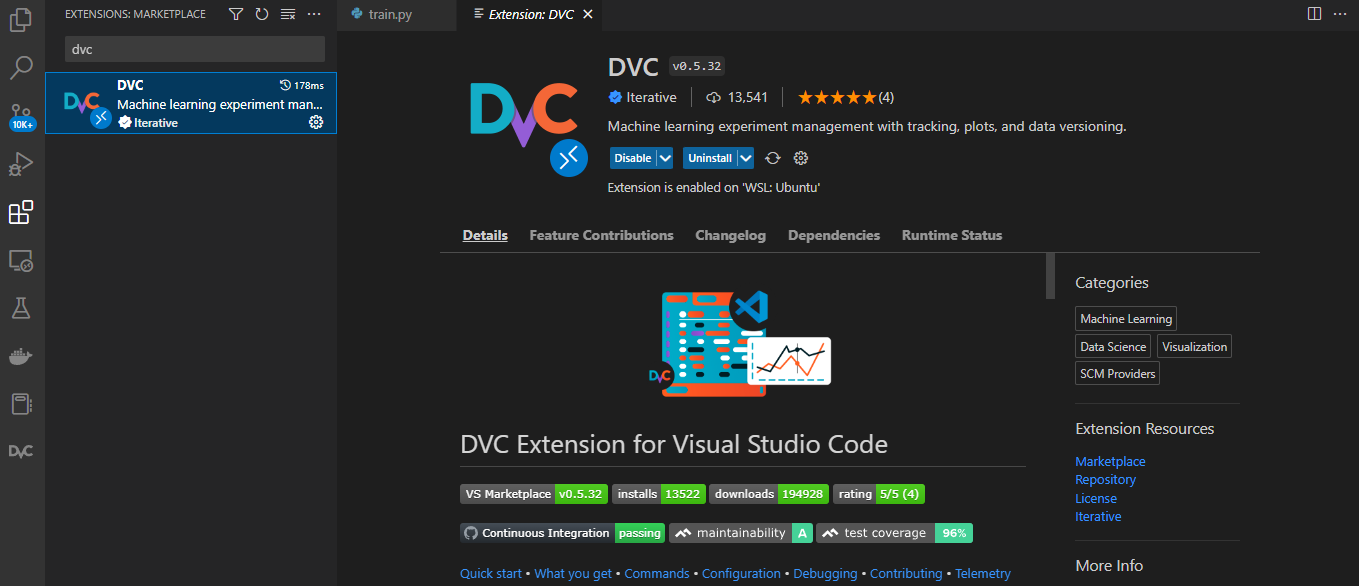

### Keeping track of hyperparameters

If you have multiple pipeline steps, the number of changing hyperparameters can quickly go out of hand. Instead of tweaking them in their own scripts, it is best practice to collect them into a single configuration file. Then, the scripts that need their specific parameters can read them from the configuration file.

DVC-supported hyperparameter tracking file is called a `params.yaml` and the one for our project currently looks like this:

```YAML
split:
  ratio: 0.1

preprocess:
  denoise_weight: 0.03
  image_width: 30
  image_height: 30

train:
  image_width: 33
  image_height: 33
  batch_size: 32
  learning_rate: 0.001
  n_epochs: 10
```

The file contains three parameter groups: `split`, `preprocess` and `train` - one for each stage of our future pipeline. 

The scripts read these parameters using the `params_show` function of `dvc.api`:

```python
from dvc.api import params_show

...

# Load the parameters from params.yaml
params = params_show()["train"]
```

> `params_show` looks for a file named `params.yaml` by default.

Now, `params` is a dictionary containing the `train` stages parameters as key-value pairs. The script uses this dictionary to pass hyperparameters to functions and classes. Here is an example from the `ImageDataGenerator` class, using the image dimensions and batch size parameters:


```python
train_generator = train_datagen.flow_from_directory(
    data_dir / "raw" / "train",
    target_size=(params["image_width"], params["image_height"]),
    batch_size=params["batch_size"],
    class_mode="categorical",
)
```

We will see the most important benefit of `params.yaml` later.

> As `params.yaml` is lightweight, it is always tracked by Git.

### How to create a pipeline in DVC?

### How to track metrics and plots in DVC?

### How to run experiments in DVC?

### Experimentation workflow in machine learning and DVC

### Next steps

Even though we have covered a lot of ground in the tutorial, there is still so much you can improve. I recommend reading the [DVC docs](https://dvc.org/doc) from top to bottom (like I did), focusing especially on the [User Guide section](https://dvc.org/doc/user-guide/overview).

From there, you can see more sophisticated ways you can run experiments, capture better metrics and plots (for example, plot templates) with `DVCLive` library, etc. If you want to learn about deploying DVC-tracked projects, don't neglect the [Use Cases section](https://dvc.org/doc/use-cases) as well.

### Conclusion

Massive congratulations to taking the first steps to clean, organized, reproducible machine learning projects! Here is an outline of the steps you should take to set up an experiment management system with DVC when starting a new project:

1. Track and store large files with `dvc add` and `dvc push`.
2. Create the scripts for stages of a pipeline. A typical pipeline consists of preprocessing, training and evaluation stages.
3. Add each stage with `dvc stage add` commands, specifying dependencies with `-d`, outputs to track with DVC with `-o`, metrics with `-M`, plots with `--plots` and so on.
4. Create a `params.yaml` file that lists hyperparameters of each pipeline stage. Use the `dvc.api.params_show` function inside your stage scripts to read the parameters as key-value pairs.
5. Run your entire pipeline as an experiment with `dvc exp run -n exp_name` or queue multiple experiments with `dvc exp run --queue`.
6. Manage and compare experiments using the DVC extension's view pane inside VSCode. 
7. Persist only chosen experiments to Git history with `dvc exp apply exp_ID` and `git add/git commit`. 
8. Iterate.

Thank you very much for reading!